In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
df=pd.read_csv('abalone.csv')
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [3]:
df.shape

(4177, 9)

In [4]:
pd.set_option('display.max_rows',None)

In [5]:
df.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

In [6]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [7]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df['Sex']=LE.fit_transform(df['Sex'])

In [8]:
df.dtypes

Sex                 int32
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

In [9]:
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
5,1,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.1200,8
6,0,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.3300,20
7,0,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.2600,16
8,2,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.1650,9
9,0,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.3200,19


In [10]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

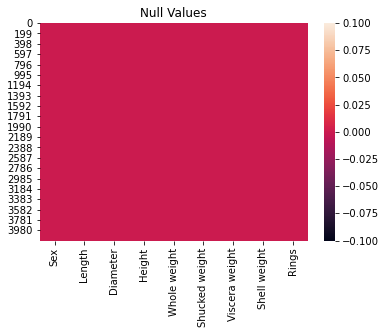

In [11]:
sns.heatmap(df.isnull())
plt.title('Null Values')
plt.show()

There are no null values in the dataset.

# Checking for Correlation

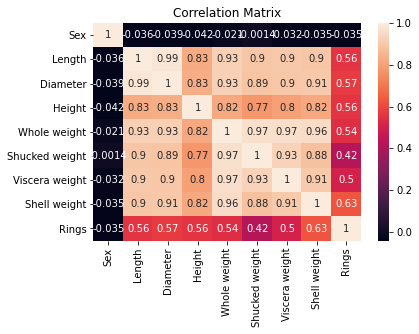

In [12]:
sns.heatmap(df.corr(), annot=True)
plt.title('Correlation Matrix')
plt.show()

In [13]:
corr_matrix=df.corr()
corr_matrix['Rings'].sort_values(ascending=False)

Rings             1.000000
Shell weight      0.627574
Diameter          0.574660
Height            0.557467
Length            0.556720
Whole weight      0.540390
Viscera weight    0.503819
Shucked weight    0.420884
Sex              -0.034627
Name: Rings, dtype: float64

# Checking for outliers

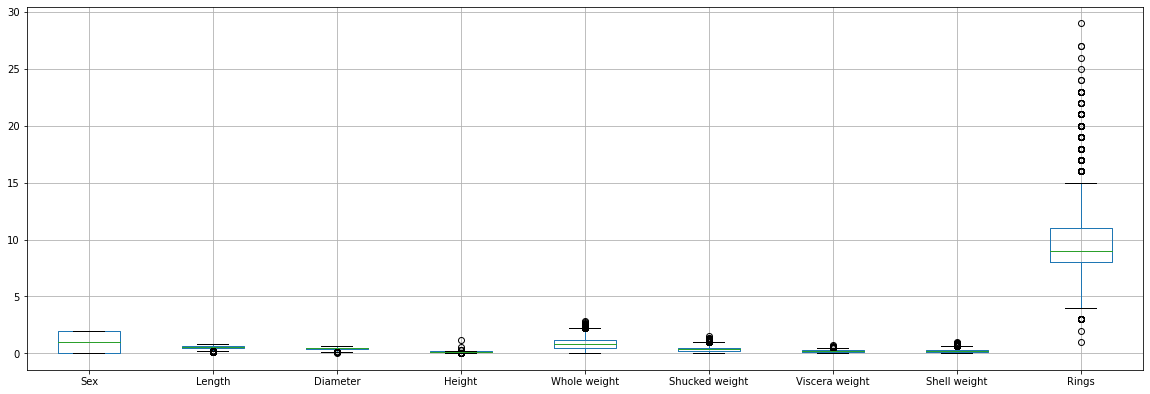

In [14]:
df.boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=.25)
plt.show()

In [15]:
from scipy.stats import zscore
z=np.abs(zscore(df))

threshold=3
print(np.where(z>3))

(array([   6,   72,   81,   83,  129,  163,  164,  165,  165,  165,  166,
        166,  167,  168,  170,  181,  232,  236,  236,  236,  237,  237,
        238,  238,  239,  270,  275,  277,  278,  294,  310,  313,  314,
        334,  351,  355,  358,  358,  362,  375,  416,  417,  428,  431,
        433,  469,  478,  480,  501,  526,  526,  530,  572,  628,  673,
        674,  675,  678,  694,  696,  696,  719,  719,  720,  720,  744,
        754,  756,  811,  891,  891,  891, 1048, 1051, 1051, 1052, 1193,
       1197, 1199, 1202, 1204, 1206, 1206, 1207, 1207, 1207, 1207, 1209,
       1209, 1257, 1417, 1417, 1418, 1422, 1426, 1427, 1427, 1427, 1428,
       1429, 1429, 1528, 1754, 1756, 1757, 1759, 1761, 1762, 1762, 1762,
       1763, 1763, 1763, 1821, 1982, 1986, 1987, 1987, 2051, 2090, 2108,
       2108, 2114, 2114, 2157, 2161, 2176, 2180, 2199, 2201, 2208, 2209,
       2274, 2275, 2305, 2334, 2334, 2334, 2335, 2344, 2358, 2368, 2381,
       2436, 2459, 2471, 2544, 2623, 2624, 2624, 2

In [16]:
df.new=df[(z<3).all(axis=1)]
df.new.shape

(4027, 9)

In [17]:
df=df.new

In [18]:
df.shape

(4027, 9)

In [19]:
x=df.drop('Sex', axis =1)
y=df['Sex']

In [20]:
x.skew()

Length           -0.623076
Diameter         -0.598650
Height           -0.244251
Whole weight      0.334204
Shucked weight    0.458295
Viscera weight    0.437116
Shell weight      0.349471
Rings             0.725464
dtype: float64

In [21]:
from sklearn.preprocessing import power_transform
x.new=power_transform(x)

x.new=pd.DataFrame(x.new,columns=x.columns)

In [22]:
x.new.skew()

Length           -0.082985
Diameter         -0.080956
Height           -0.015962
Whole weight     -0.016797
Shucked weight    0.021815
Viscera weight    0.035902
Shell weight      0.016660
Rings             0.004745
dtype: float64

In [23]:
x=x.new

In [24]:
y.skew()

-0.09488601247020338

# Finding best random_state

In [25]:
from sklearn.linear_model import LogisticRegression
maxAccu=0
maxRS=0

for i in range(1,150):
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.30, random_state =i)
    LR=LogisticRegression 
    LR.fit(x_train, y_train)
    predlr=LR.predict(x_test) 
    acc=accuracy_score(y_test, predlr)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i

print("Best accuracy is ", maxAccu," on Random_state ", maxRS)

TypeError: fit() missing 1 required positional argument: 'y'

In [26]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=155)

In [27]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()
LR.fit(x_train,y_train)
LR.score(x_train,y_train)
predlr=LR.predict(x_test)
print(accuracy_score(y_test,predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

0.6029776674937966
[[135  57 177]
 [ 11 345  47]
 [102  86 249]]
              precision    recall  f1-score   support

           0       0.54      0.37      0.44       369
           1       0.71      0.86      0.77       403
           2       0.53      0.57      0.55       437

    accuracy                           0.60      1209
   macro avg       0.59      0.60      0.59      1209
weighted avg       0.59      0.60      0.59      1209



In [28]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train)
preddtc=dtc.predict(x_test)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

0.4880066170388751
[[153  56 160]
 [ 46 270  87]
 [186  84 167]]
              precision    recall  f1-score   support

           0       0.40      0.41      0.41       369
           1       0.66      0.67      0.66       403
           2       0.40      0.38      0.39       437

    accuracy                           0.49      1209
   macro avg       0.49      0.49      0.49      1209
weighted avg       0.49      0.49      0.49      1209



In [29]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
predrf=rf.predict(x_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

0.5558312655086849
[[132  53 184]
 [ 30 324  49]
 [152  69 216]]
              precision    recall  f1-score   support

           0       0.42      0.36      0.39       369
           1       0.73      0.80      0.76       403
           2       0.48      0.49      0.49       437

    accuracy                           0.56      1209
   macro avg       0.54      0.55      0.55      1209
weighted avg       0.54      0.56      0.55      1209



In [30]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(x_train,y_train)

ad_pred=svc.predict(x_test)
print(accuracy_score(y_test,ad_pred))
print(confusion_matrix(y_test,ad_pred))
print(classification_report(y_test,ad_pred))

0.5913978494623656
[[107  49 213]
 [  8 336  59]
 [ 80  85 272]]
              precision    recall  f1-score   support

           0       0.55      0.29      0.38       369
           1       0.71      0.83      0.77       403
           2       0.50      0.62      0.55       437

    accuracy                           0.59      1209
   macro avg       0.59      0.58      0.57      1209
weighted avg       0.59      0.59      0.57      1209



In [31]:
from sklearn.model_selection import cross_val_score

scr=cross_val_score(LR, x, y, cv=5)
print('Cross validation score of LinearRegression model :',scr.mean())

Cross validation score of LinearRegression model : 0.5564946133810088


In [32]:
from sklearn.model_selection import cross_val_score

scr=cross_val_score(dtc, x, y, cv=5)
print('Cross validation score of DecissionTreeClassifier model :',scr.mean())

Cross validation score of DecissionTreeClassifier model : 0.48448468782269616


In [33]:
from sklearn.model_selection import cross_val_score

scr=cross_val_score(rf, x, y, cv=5)
print('Cross validation score of RandomForestClassifier model :',scr.mean())

Cross validation score of RandomForestClassifier model : 0.5480514156250482


In [34]:
from sklearn.model_selection import cross_val_score

scr=cross_val_score(svc, x, y, cv=5)
print('Cross validation score of SVC model :',scr.mean())

Cross validation score of SVC model : 0.5532663409521754


Minimum difference in accuracy and cross validation is for Decission Tree Classifier model. (0.2)
Hence DecissionTreeClassifier is our best model.

# Hyper Parameter Tuning

In [35]:
from sklearn.model_selection import GridSearchCV

In [36]:
parameters= {'max_depth':np.arange(2,15),
            'criterion':['gini','entropy']}

In [37]:
GCV=GridSearchCV(DecisionTreeClassifier(),parameters,cv=5)

In [38]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])})

In [39]:
GCV.best_params_

{'criterion': 'entropy', 'max_depth': 6}

In [40]:
GCV_pred=GCV.best_estimator_.predict(x_test)

In [41]:
accuracy_score(y_test,GCV_pred)

0.5516956162117452

In [42]:
import joblib
joblib.dump(GCV.best_estimator_,'abalone.pkl')

['abalone.pkl']